


#Correlação e Regressão Simples/Multivariada
#Desafio Final




#Considerando a base de dados kc_house_data.csv responda as questões de 1 a 6 abaixo:


In [ ]:
#Importando as bibliotecas

# Manipulação de Dados
import pandas as pd
import numpy as np
from google.colab import files
import math

# Datas
from datetime import datetime, timedelta

# Visualizações
from matplotlib import pyplot as plt
import seaborn as sns

# Estatística
import scipy.stats as stat
from scipy.stats import binom
from collections import Counter
from scipy import stats
import statsmodels.api as sm


In [ ]:
### leitura dos dados csv
df_house_data_original = pd.read_csv('JjXq5hnmTTi1cjAdm20M_kc_house_data.csv')

In [ ]:
df_house_data_original.head()


In [ ]:
#Renomeação das colunas para facilitar a visualização

novos_nomes = {
    'price': 'Preço',
    'bedrooms': 'Quartos',
    'bathrooms': 'Banheiros',
    'sqft_living': 'Tam. Imóvel',
    'sqft_lot': 'Tam. Lot',
    'floors': 'Andares',
    'waterfront': 'Vista mar',
    'view': 'Qnt. Vista mar',
    'condition': 'Condição imóvel',
    'grade': 'Nota imóvel',
    'sqft_above': 'Tam. Imóvel acima do solo',
    'sqft_basement': 'Tam. Imóvel porão',
    'yr_built': 'Ano construção',
    'yr_renovated': 'Ano reforma',
    'zipcode': 'CEP',
    'lat': 'Latitude',
    'long': 'Longitude',
    'sqft_living15': 'Tam. Imóvel 15 vizinhos',
    'sqft_lot15': 'Tam. Lot 15 vizinhos'
}

df_house_data_original_pt = df_house_data_original.rename(columns=novos_nomes)

In [ ]:
#Visualização do DF traduzido
df_house_data_original_pt.head()

,id,date,Preço,Quartos,Banheiros,Tam. Imóvel,Tam. Lot,Andares,Vista mar,Qnt. Vista mar,...,Nota imóvel,Tam. Imóvel acima do solo,Tam. Imóvel porão,Ano construção,Ano reforma,CEP,Latitude,Longitude,Tam. Imóvel 15 vizinhos,Tam. Lot 15 vizinhos
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,n,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,n,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,n,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,n,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,n,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


1. Codifique e exiba a matriz de correlação entre as variáveis numéricas.
Além disso, qual é a correlação entre o preço price e o número de
quartos bedrooms? Existe alguma diferença na correlação quando
consideramos apenas casas com uma área total sqft_living ('Tam. Imóvel') superior a
2000 pés quadrados?


In [ ]:
#Selecionar apenas colunas de variáveis numéricas
df_colunas_numericas = df_house_data_original_pt.loc[:, ['Preço', 'Quartos', 'Andares', 'Nota imóvel', 'Ano construção', 'Condição imóvel']]
df_colunas_numericas
#df_colunas_numericas.info()

,Preço,Quartos,Andares,Nota imóvel,Ano construção,Condição imóvel
0,221900.0,3,1.0,7,1955,3
1,538000.0,3,2.0,7,1951,3
2,180000.0,2,1.0,6,1933,3
3,604000.0,4,1.0,7,1965,5
4,510000.0,3,1.0,8,1987,3
...,...,...,...,...,...,...
9994,650000.0,3,1.0,8,1965,3
9995,1360000.0,2,2.0,8,1931,3
9996,1960000.0,3,1.0,8,1960,4
9997,1190000.0,2,1.0,8,1939,4


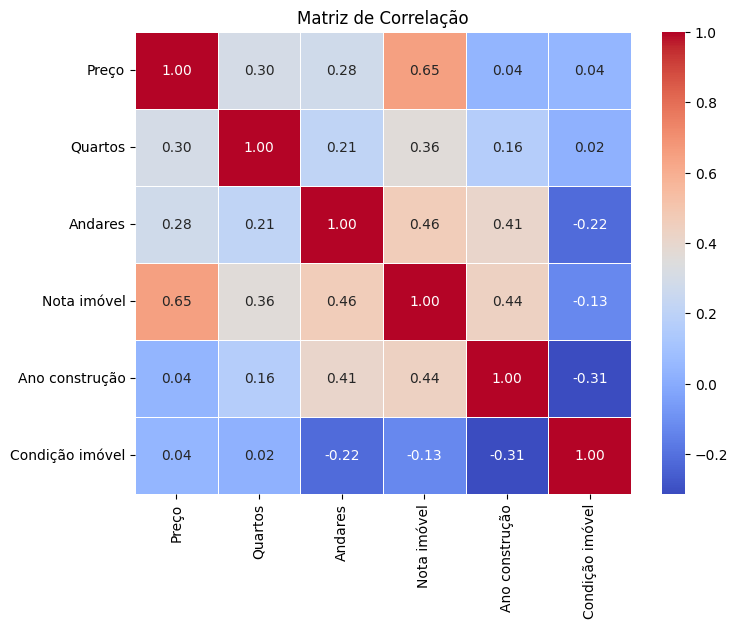

'\nInterpretação Geral dos Valores de Correlação:\n\n|r| < 0.3: Correlação Fraca\n0.3 ≤ |r| < 0.7: Correlação Moderada a Forte\n|r| ≥ 0.7: Correlação Forte a Muito Forte\n'

In [ ]:
#Calcular a correlação entre as variáveis numéricas
df_correlacao_colunas_numericas = df_colunas_numericas.corr()
df_correlacao_colunas_numericas

#Apresentar a correlação em painel de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(df_correlacao_colunas_numericas, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

'''
Interpretação Geral dos Valores de Correlação:

|r| < 0.3: Correlação Fraca
0.3 ≤ |r| < 0.7: Correlação Moderada a Forte
|r| ≥ 0.7: Correlação Forte a Muito Forte
'''
#             Respostas
# O preço tem correlação positiva de moderada a forte com a nota do imóvel
# A quantidade de quartos tem correlação positiva fraca com a nota do imóvel.
# A quantidade de andares do imóvel tem correlação positiva e fraca com a nota do imóvel
# O ano de construção tem correlação positiva de moderada a forte com a nota do imóvel.

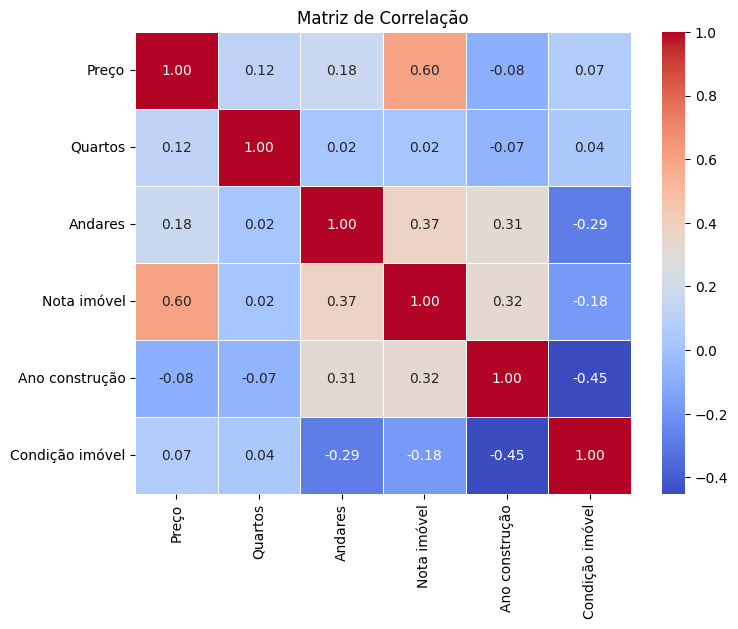

'\nInterpretação Geral dos Valores de Correlação:\n\n|r| < 0.3: Correlação Fraca\n0.3 ≤ |r| < 0.7: Correlação Moderada a Forte\n|r| ≥ 0.7: Correlação Forte a Muito Forte\n'

In [ ]:
#Existe alguma diferença na correlação quando consideramos apenas casas com uma área total sqft_living ('Tam. Imóvel') superior a 2000 pés quadrados?

#Seleção de colunas de valores numéricos e com tamanho de imóvel maior que 2000 pés quadrados
df_tam_imovel_e_variaveis_numericas = df_house_data_original_pt.loc[df_house_data_original_pt['Tam. Imóvel'] > 2000, ['Preço', 'Quartos', 'Andares', 'Nota imóvel', 'Ano construção', 'Condição imóvel']]
df_tam_imovel_e_variaveis_numericas

#Calcular a correlação entre as variáveis numéricas
df_correlacao_tam_imovel_e_variaveis_numericas = df_tam_imovel_e_variaveis_numericas.corr()

#Apresentar a correlação em painel de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(df_correlacao_tam_imovel_e_variaveis_numericas, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

'''
Interpretação Geral dos Valores de Correlação:

|r| < 0.3: Correlação Fraca
0.3 ≤ |r| < 0.7: Correlação Moderada a Forte
|r| ≥ 0.7: Correlação Forte a Muito Forte
'''
#Resposta: Existe diferença, as correlações ficam mais fracas ou se tornam negativas.

2. Existe alguma correlação entre o preço price e a área total da casa
sqft_living, considerando apenas casas com pelo menos dois
banheiros bathrooms?

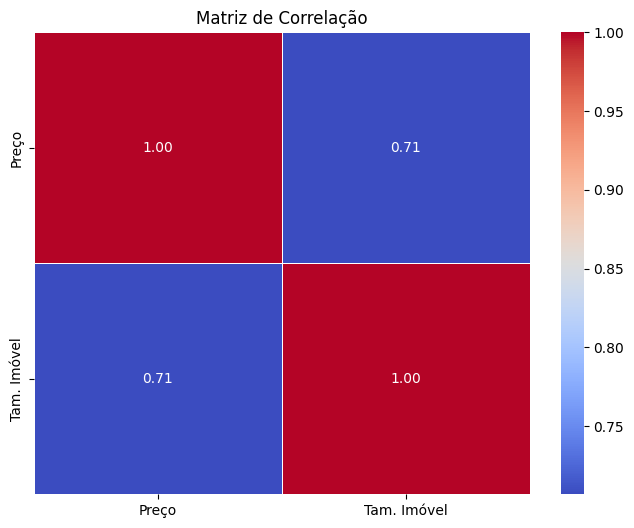

In [ ]:
#Seleção de colunas de valores numéricos e com imóveis com pelo menos 2 banheiros.
df_preco_tam_imovel_banheiro = df_house_data_original_pt.loc[df_house_data_original_pt['Banheiros'] >= 2, ['Preço', 'Tam. Imóvel']]
df_preco_tam_imovel_banheiro

#Calcular a correlação entre as variáveis numéricas
df_correlacao_preco_tam_imovel_banheiro = df_preco_tam_imovel_banheiro.corr()

#Apresentar a correlação em painel de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(df_correlacao_preco_tam_imovel_banheiro, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

# Resposta:
# Sim, existe uma correlação positiva forte entre imóvel que possuem pelo menos 2 banheiros, em relação ao preço e o tamanho do imóvel.


3. Como a quantidade de banheiros bathrooms influencia na correlação
entre a área total da casa sqft_living e o preço price?

In [ ]:
df_tam_imovel_banheiros = df_house_data_original_pt.loc[:, ['Banheiros', 'Tam. Imóvel', 'Preço']]
df_tam_imovel_banheiros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Banheiros    9999 non-null   float64
 1   Tam. Imóvel  9999 non-null   int64  
 2   Preço        9999 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 234.5 KB


Correlação entre Quantidade de Banheiros e Preço:              Banheiros  Tam. Imóvel     Preço
Banheiros     1.000000     0.764810  0.521193
Tam. Imóvel   0.764810     1.000000  0.702199
Preço         0.521193     0.702199  1.000000


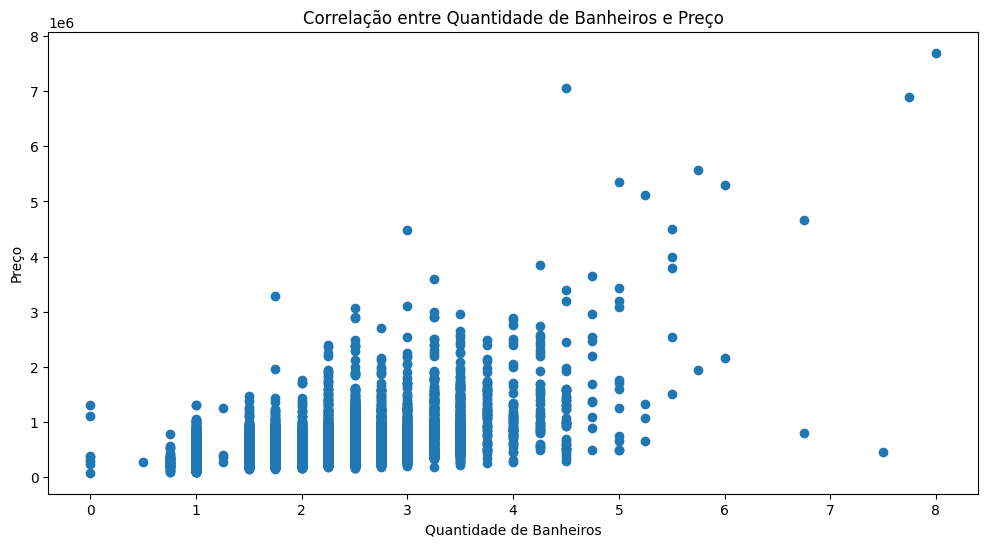

In [ ]:
#df_house_data_original_pt['Banheiros'].value_counts()

#Seleção de colunas de valores numéricos e com tamanho de imóveis.
df_tam_imovel_banheiros = df_house_data_original_pt.loc[:, ['Banheiros', 'Tam. Imóvel', 'Preço']]
df_tam_imovel_banheiros.corr()

#Calcular a correlação entre as variáveis numéricas
#df_correlacao_preco_tam_imovel_banheiro = df_tam_imovel_banheiros.corr()

# Calculando a correlação entre 'Quantidade de Banheiros' e 'Preço em Milhares'
correlacao = df_house_data_original_pt[['Banheiros', 'Tam. Imóvel', 'Preço']].corr()

print(f"Correlação entre Quantidade de Banheiros e Preço: {correlacao}")

# Plotando um gráfico de dispersão (scatter plot)
plt.figure(figsize=(12, 6))
plt.scatter(df_house_data_original_pt['Banheiros'], df_house_data_original_pt['Preço'])
plt.title('Correlação entre Quantidade de Banheiros e Preço')
plt.xlabel('Quantidade de Banheiros')
plt.ylabel('Preço')

plt.show()

#

4. Qual é a relação entre a condição da casa condition e o preço price,
considerando apenas casas com uma área total sqft_living superior a
3000 pés quadrados?

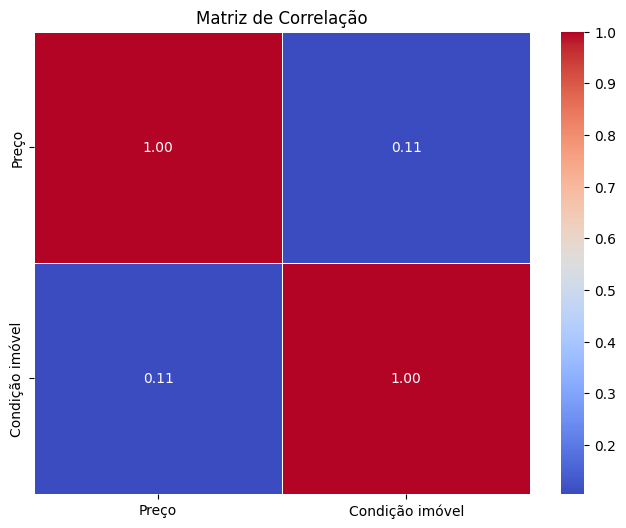

'\nInterpretação Geral dos Valores de Correlação:\n\n|r| < 0.3: Correlação Fraca\n0.3 ≤ |r| < 0.7: Correlação Moderada a Forte\n|r| ≥ 0.7: Correlação Forte a Muito Forte\n'

In [ ]:
#Seleção de colunas de valores numéricos e com tamanho de imóvel maior que 3000 pés quadrados
df_condicao_e_variaveis_numericas = df_house_data_original_pt.loc[df_house_data_original_pt['Tam. Imóvel'] > 3000, ['Preço', 'Condição imóvel']]
df_condicao_e_variaveis_numericas

#Calcular a correlação entre as variáveis numéricas
df_correlacao_condicao_e_variaveis_numericas = df_condicao_e_variaveis_numericas.corr()

#Apresentar a correlação em painel de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(df_correlacao_condicao_e_variaveis_numericas, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

'''
Interpretação Geral dos Valores de Correlação:

|r| < 0.3: Correlação Fraca
0.3 ≤ |r| < 0.7: Correlação Moderada a Forte
|r| ≥ 0.7: Correlação Forte a Muito Forte
'''

# Resposta

# Em imóveis que tem um tamanho superior a 3 mil pés existe uma correlação muito fraca entre o preço e a condição do imóvel.

5. Existe alguma correlação entre a localização geográfica lat e long e o
preço price para casas com pelo menos três quartos bedrooms?

In [ ]:
#        ####TA FALTANDO RESOLVER  ####

#Seleção de colunas de latitude, longitude e preço em imóveis com 3 quartos.
df_lat_long_preco = df_house_data_original_pt.loc[df_house_data_original_pt['Quartos'] >= 3, ['Latitude', 'Longitude']]
df_lat_long_preco.value_counts()

# Definir intervalos para latitude e longitude
lat_bins = np.linspace(df_lat_long_preco['Latitude'].min(), df_lat_long_preco['Latitude'].max(), num=4)  # Dividir em 3 intervalos
lon_bins = np.linspace(df_lat_long_preco['Longitude'].min(), df_lat_long_preco['Longitude'].max(), num=4)  # Dividir em 3 intervalos

# Criar categorias de latitude e longitude
df_lat_long_preco['Categoria_Latitude'] = pd.cut(df_lat_long_preco['Latitude'], bins=lat_bins, labels=['Baixa', 'Média', 'Alta'])
df_lat_long_preco['Categoria_Longitude'] = pd.cut(df_lat_long_preco['Longitude'], bins=lon_bins, labels=['Oeste', 'Central', 'Leste'])

#print(df_lat_long_preco)

df_lat_long_preco.value_counts()

# Converter value_counts() em um DataFrame
aux_contagem = df_lat_long_preco.value_counts()
contagem_df = aux_contagem.reset_index()
contagem_df

,Latitude,Longitude,Categoria_Latitude,Categoria_Longitude,count
0,47.5434,-122.293,Média,Oeste,3
1,47.5233,-122.386,Média,Oeste,2
2,47.5536,-122.286,Média,Oeste,2
3,47.5080,-122.337,Média,Oeste,2
4,47.6357,-122.324,Alta,Oeste,2
...,...,...,...,...,...
8445,47.5033,-122.300,Média,Oeste,1
8446,47.5033,-122.372,Média,Oeste,1
8447,47.5031,-122.152,Média,Oeste,1
8448,47.5031,-122.242,Média,Oeste,1


#6. Calcule a correlação entre uma variável categórica(waterfront) e uma
#variável numérica(price) usando ANOVA.

Correlação entre 'waterfront' e 'preço': 0.3987310121005604


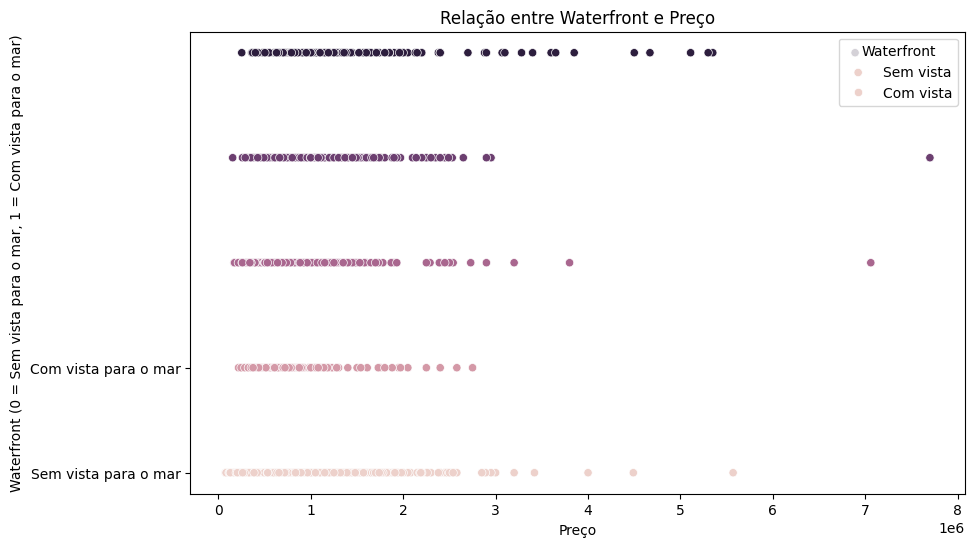

In [ ]:
#Visualização dos dados
waterfront = df_house_data_original_pt['Qnt. Vista mar'].value_counts()
waterfront

price = df_house_data_original_pt['Preço'].value_counts()
price

#Calculo da correlação entre as variáveis.
correlacao = df_house_data_original_pt['Qnt. Vista mar'].corr(df_house_data_original_pt['Preço'])
print("Correlação entre 'waterfront' e 'preço':", correlacao)

# Agrupamento dos dados pela variável 'waterfront' e calculo da média dos preços
media_preco_por_waterfront = df_house_data_original_pt.groupby('Qnt. Vista mar')['Preço'].mean().reset_index()

# Plotar o gráfico de dispersão com cores diferentes para cada categoria de 'waterfront'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Preço', y='Qnt. Vista mar', hue='Qnt. Vista mar', data=df_house_data_original_pt)
plt.title('Relação entre Waterfront e Preço')
plt.xlabel('Preço')
plt.ylabel('Waterfront (0 = Sem vista para o mar, 1 = Com vista para o mar)')
plt.yticks([0, 1], ['Sem vista para o mar', 'Com vista para o mar'])  # Renomear os ticks do eixo y
plt.legend(title='Waterfront', loc='upper right', labels=['Sem vista', 'Com vista'])  # Adicionar legenda
plt.show()

#Considerando a base de dados car_price.csv responda as questões de 7 a 11 abaixo:

In [ ]:
### leitura dos dados csv
df_car_preco_original = pd.read_csv("3BZ0OPwuSRqV99ISfq7M_car_price.csv", sep = ",")

In [ ]:
df_car_preco_original.head(10)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
5,Maruti Suzuki,Ciaz ZXi,675000,2017,73315,Petrol,Manual,Pune,Grey,First,Individual,1373 cc,91 bhp @ 6000 rpm,130 Nm @ 4000 rpm,FWD,4490.0,1730.0,1485.0,5.0,43.0
6,BMW,X1 xDrive20d M Sport,2650000,2017,75000,Diesel,Automatic,Coimbatore,White,Second,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,AWD,4439.0,1821.0,1612.0,5.0,51.0
7,Skoda,Octavia 1.8 TSI Style Plus AT [2017],1390000,2017,56000,Petrol,Automatic,Mumbai,White,First,Individual,1798 cc,177 bhp @ 5100 rpm,250 Nm @ 1250 rpm,FWD,4670.0,1814.0,1476.0,5.0,50.0
8,Nissan,Terrano XL (D),575000,2015,85000,Diesel,Manual,Mumbai,White,First,Individual,1461 cc,84 bhp @ 3750 rpm,200 Nm @ 1900 rpm,FWD,4331.0,1822.0,1671.0,5.0,50.0
9,Hyundai,Elite i20 Sportz 1.2,591000,2017,20281,Petrol,Manual,Mumbai,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,115 Nm @ 4000 rpm,FWD,3985.0,1734.0,1505.0,5.0,45.0


#7. Codifique e exiba a Matriz de correlação para as variáveis numéricas e
#dê exemplos de correlações positivas, negativas e neutras.

In [ ]:
df_car_preco_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1874 non-null   object 
 1   Model               1874 non-null   object 
 2   Price               1874 non-null   int64  
 3   Year                1874 non-null   int64  
 4   Kilometer           1874 non-null   int64  
 5   Fuel Type           1874 non-null   object 
 6   Transmission        1874 non-null   object 
 7   Location            1874 non-null   object 
 8   Color               1874 non-null   object 
 9   Owner               1874 non-null   object 
 10  Seller Type         1874 non-null   object 
 11  Engine              1874 non-null   object 
 12  Max Power           1874 non-null   object 
 13  Max Torque          1874 non-null   object 
 14  Drivetrain          1874 non-null   object 
 15  Length              1874 non-null   float64
 16  Width 

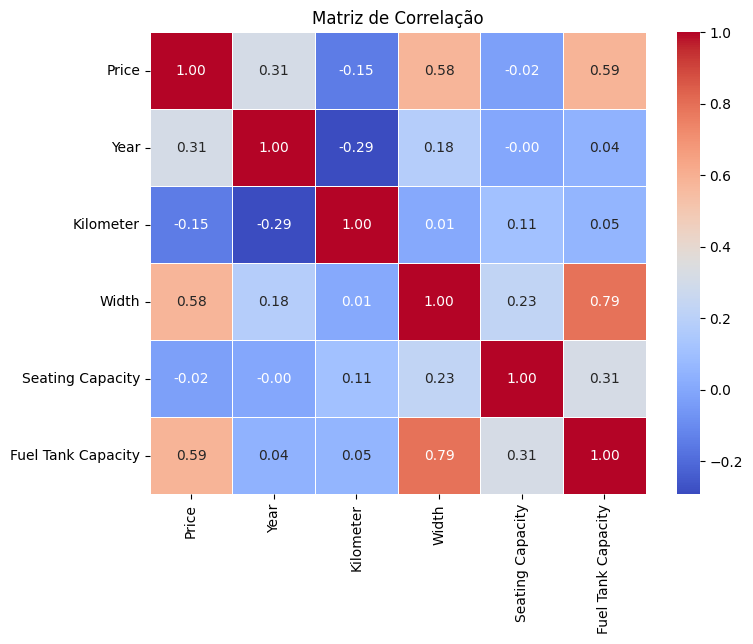

'\nInterpretação Geral dos Valores de Correlação:\n\n|r| < 0.3: Correlação Fraca\n0.3 ≤ |r| < 0.7: Correlação Moderada a Forte\n|r| ≥ 0.7: Correlação Forte a Muito Forte\n'

In [ ]:
#Selecionar apenas colunas de variáveis numéricas
df_colunas_numericas_carros = df_car_preco_original.loc[:, ['Price', 'Year', 'Kilometer', 'Width', 'Seating Capacity', 'Fuel Tank Capacity']]
df_colunas_numericas_carros

#Calcular a correlação entre as variáveis numéricas
df_correlacao_colunas_numericas_carros = df_colunas_numericas_carros.corr()
df_correlacao_colunas_numericas_carros

#Apresentar a correlação em painel de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(df_correlacao_colunas_numericas_carros, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

'''
Interpretação Geral dos Valores de Correlação:

|r| < 0.3: Correlação Fraca
0.3 ≤ |r| < 0.7: Correlação Moderada a Forte
|r| ≥ 0.7: Correlação Forte a Muito Forte
'''

#POSITIVAS:
  # PRICE vs  FUEL TANK
  # PRICE vs  WIDTH
  # WIDTH vs FUEL TANK
#NEUTRAS:
  # YEAR vs Seating Capacity
  # Kilometer vs Fuel Tank Capacity
  # Kilometer vs WIDTH
#NEGATIVAS:
  # PRICE vs Seating Capacity
  # YEAR vs Kilometer

#8. Codifique e exiba Gráficos de Dispersão para cada uma das variáveis
# numéricas em relação à variável de interesse Price.


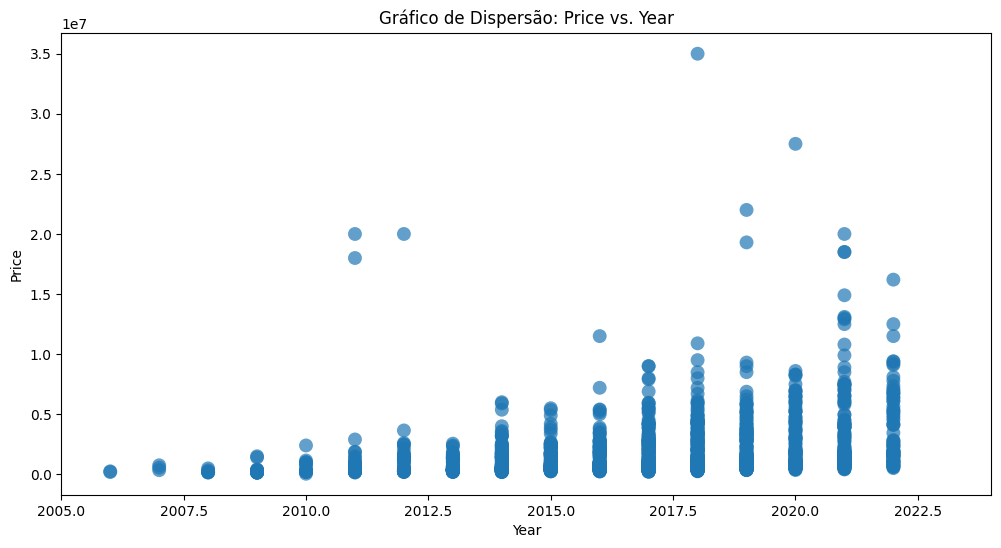

In [ ]:
    #Variáveis numéricas:
#'Price', 'Year', 'Kilometer', 'Width', 'Seating Capacity', 'Fuel Tank Capacity'

#Gráfico de dispersão para Price e Year
plt.figure(figsize=(12, 6))
plt.scatter(df_colunas_numericas_carros['Year'], df_colunas_numericas_carros['Price'], s=100, alpha=0.7, edgecolors='none')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Gráfico de Dispersão: Price vs. Year')

# Definindo limites do eixo x para restringir o intervalo de anos mostrado
plt.xlim(2005, 2024)
plt.show()

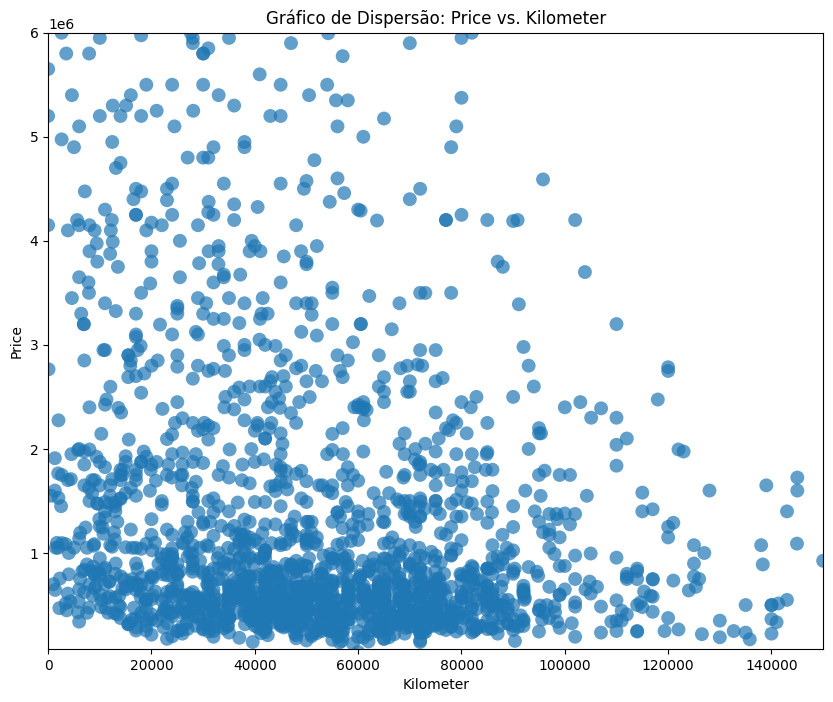

In [ ]:
#Gráfico de dispersão para Price e Kilometer
plt.figure(figsize=(10, 8))
plt.scatter(df_colunas_numericas_carros['Kilometer'], df_colunas_numericas_carros['Price'], s=100, alpha=0.7, edgecolors='none')
plt.xlabel('Kilometer')
plt.ylabel('Price')
plt.title('Gráfico de Dispersão: Price vs. Kilometer')

# Definindo limites do eixo x para restringir o intervalo de anos mostrado
plt.xlim(0, 150000)
plt.ylim(80000, 6000000)
plt.show()


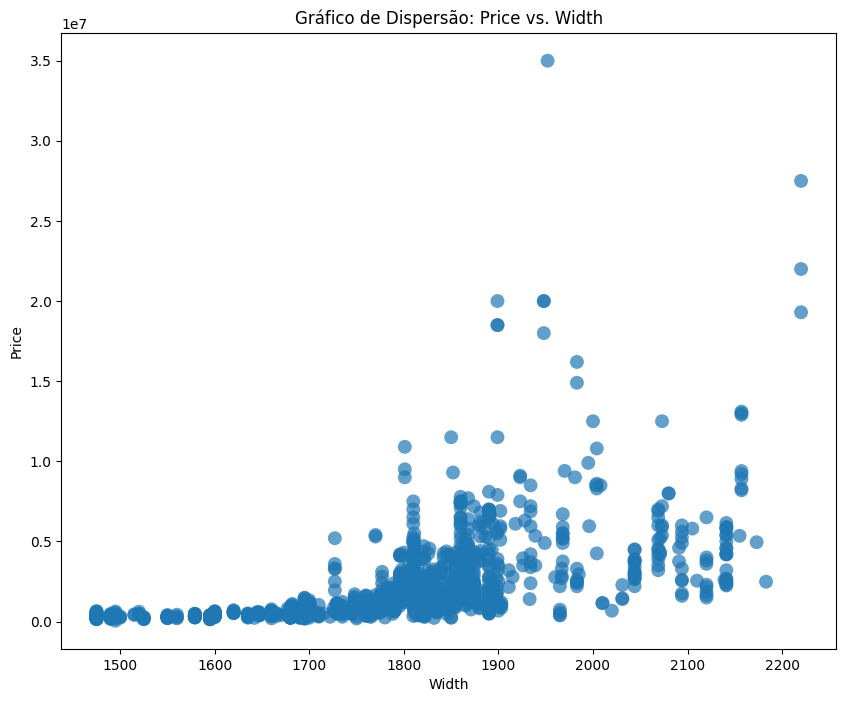

In [ ]:
#Gráfico de dispersão para Price e Width
plt.figure(figsize=(10, 8))
plt.scatter(df_colunas_numericas_carros['Width'], df_colunas_numericas_carros['Price'], s=100, alpha=0.7, edgecolors='none')
plt.xlabel('Width')
plt.ylabel('Price')
plt.title('Gráfico de Dispersão: Price vs. Width')
plt.show()

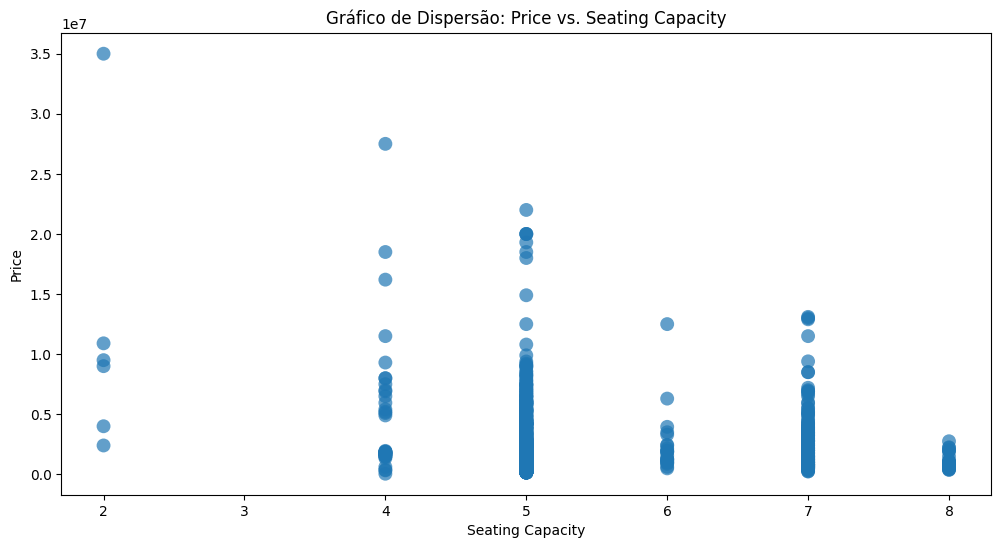

In [ ]:
#Gráfico de dispersão para Price e Kilometer
plt.figure(figsize=(12, 6))
plt.scatter(df_colunas_numericas_carros['Seating Capacity'], df_colunas_numericas_carros['Price'], s=100, alpha=0.7, edgecolors='none')
plt.xlabel('Seating Capacity')
plt.ylabel('Price')
plt.title('Gráfico de Dispersão: Price vs. Seating Capacity')
plt.show()

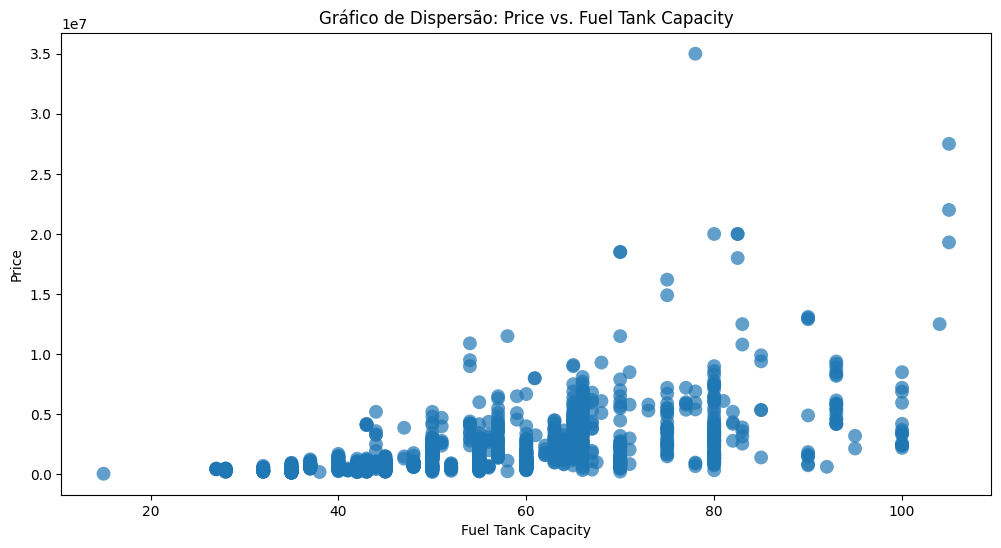

In [ ]:
#Gráfico de dispersão para Price e Fuel Tank Capacity
plt.figure(figsize=(12, 6))
plt.scatter(df_colunas_numericas_carros['Fuel Tank Capacity'], df_colunas_numericas_carros['Price'], s=100, alpha=0.7, edgecolors='none')
plt.xlabel('Fuel Tank Capacity')
plt.ylabel('Price')
plt.title('Gráfico de Dispersão: Price vs. Fuel Tank Capacity')
plt.show()

9. Crie um modelo de Regressão Linear Simples, exiba a Tabela de
Regressão e exiba o plot da Reta Estimada.


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     979.6
Date:                Fri, 10 May 2024   Prob (F-statistic):          2.59e-173
Time:                        12:01:51   Log-Likelihood:                -29815.
No. Observations:                1874   AIC:                         5.963e+04
Df Residuals:                    1872   BIC:                         5.965e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.177e+06   1.63

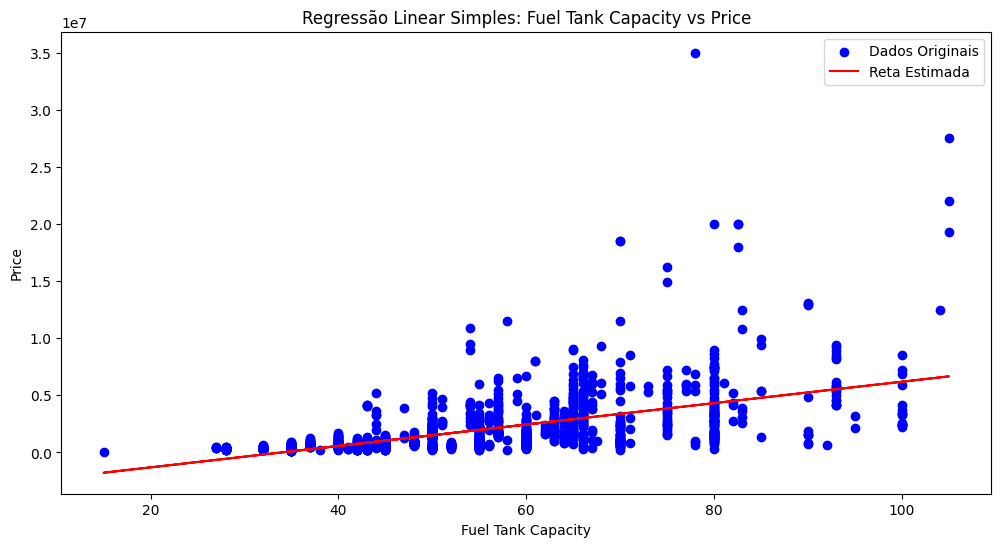

In [ ]:
# Criar um DataFrame com dados fictícios
data = df_car_preco_original.loc[:, ['Fuel Tank Capacity', 'Price']]
df = pd.DataFrame(data)

# Definir variáveis independentes (X) e dependente (y)
X = df['Fuel Tank Capacity']  # Variável independente (anos de experiência)
y = df['Price']  # Variável dependente (salário)

# Adicionar uma constante ao X para ajustar o intercepto no modelo
X = sm.add_constant(X)

# Criar e ajustar o modelo de regressão linear
model = sm.OLS(y, X).fit()

# Exibir a tabela de regressão
print(model.summary())

# Plotar o gráfico de dispersão e a reta estimada
plt.figure(figsize=(12, 6))
plt.scatter(df['Fuel Tank Capacity'], df['Price'], color='blue', label='Dados Originais')
plt.plot(df['Fuel Tank Capacity'], model.predict(X), color='red', label='Reta Estimada')

# Adicionar rótulos e título
plt.xlabel('Fuel Tank Capacity')
plt.ylabel('Price')
plt.title('Regressão Linear Simples: Fuel Tank Capacity vs Price')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.show()

10. Codifique e exiba o gráfico dos resíduos do modelo de Regressão
Simples.


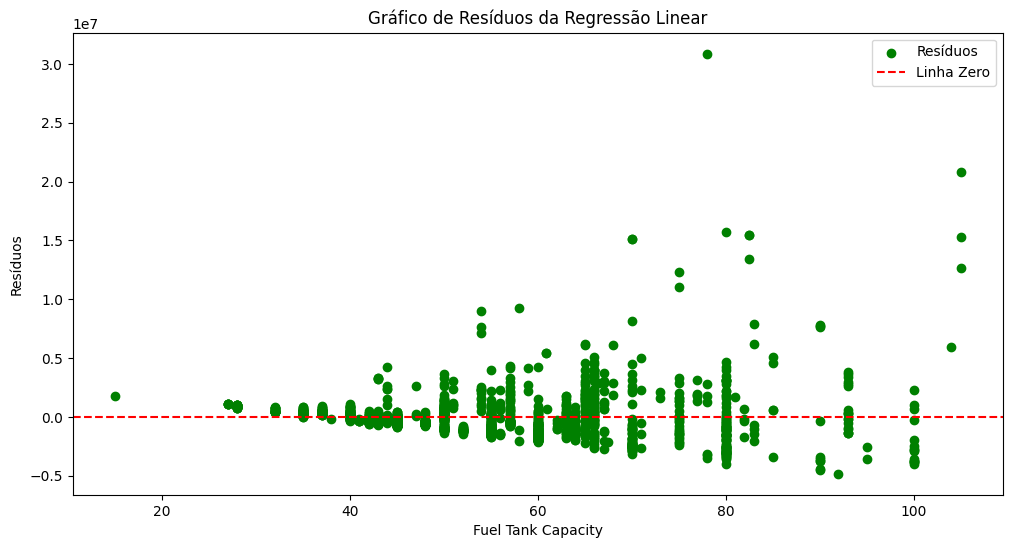

In [ ]:
# Calcular e plotar os resíduos
residuos = model.resid

plt.figure(figsize=(12, 6))
plt.scatter(df['Fuel Tank Capacity'], residuos, color='green', label='Resíduos')
plt.axhline(y=0, color='red', linestyle='--', label='Linha Zero')

# Adicionar rótulos e título
plt.xlabel('Fuel Tank Capacity')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos da Regressão Linear')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.show()



11. Crie um modelo de Regressão Multivariada, exiba a Tabela de Regressão
e exiba o gráfico dos resíduos do modelo.



                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     68.95
Date:                Fri, 10 May 2024   Prob (F-statistic):           2.74e-42
Time:                        12:01:59   Log-Likelihood:                -30111.
No. Observations:                1874   AIC:                         6.023e+04
Df Residuals:                    1870   BIC:                         6.025e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.528e+08   3.58e+07  

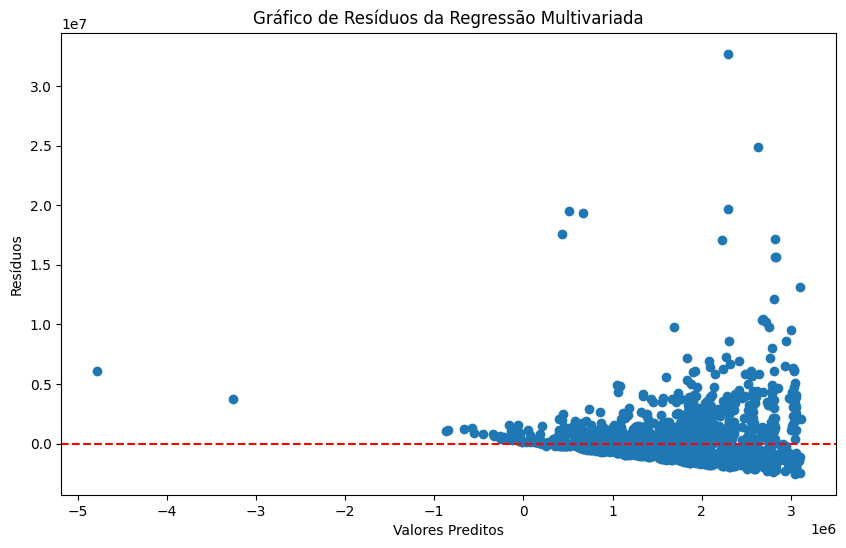

In [ ]:
# Criando dados fictícios para exemplo
data = df_car_preco_original.loc[:, ['Price', 'Year', 'Kilometer', 'Seating Capacity']]
df_colunas_numericas_carros

df = pd.DataFrame(data)

# Adicionando uma constante para o termo independente (intercepto)
X = sm.add_constant(df[['Year', 'Kilometer', 'Seating Capacity']])
Y = df['Price']

# Ajustando o modelo de regressão
model = sm.OLS(Y, X).fit()

# Exibindo a tabela de regressão
print(model.summary())

# Plotando o gráfico de resíduos
plt.figure(figsize=(10, 6))
plt.scatter(model.predict(), model.resid)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos da Regressão Multivariada')
plt.show()